In [18]:
import numpy
import math
from datetime import datetime
import matplotlib.dates as dates
from scipy.optimize import curve_fit

def logfunc(x, a, b, c): # x-shifted log
    return a*numpy.log(x + b)+c

hora_x = numpy.array(["2022-10-30T16:15","2022-10-30T16:30","2022-10-30T16:51","2022-10-30T17:03","2022-10-30T17:06","2022-10-30T17:07","2022-10-30T17:13","2022-10-30T17:16","2022-10-30T17:17","2022-10-30T17:21","2022-10-30T17:40","2022-10-30T17:50","2022-10-30T18:00","2022-10-30T18:15"], dtype='datetime64')
#print("hora_x", hora_x)
percent_bolso_y = numpy.array([0.5651, 0.5239, 0.5148, 0.5106, 0.5104, 0.5091, 0.5078, 0.507, 0.5066, 0.5061, 0.5008, 0.4985, 0.496, 0.4941])
percent_lula_y = numpy.array([0.4349, 0.4761, 0.4852, 0.4894, 0.4896, 0.4909, 0.4922, 0.4930, 0.4934, 0.4946, 0.4992, 0.5015, 0.504, 0.5059])

novox = dates.date2num(hora_x)
#print("novox", novox)
ultimo_novox = novox[len(novox)-1]
xlongaduracao = numpy.arange(novox[0], ultimo_novox+4*(ultimo_novox-novox[len(novox)-2]), (novox[1]-novox[0])/4).tolist()
initialParameters = numpy.array([-0.09, -1929.0, 0.3])

#print("xlongaduracao", xlongaduracao)
fittedParameters_bolso, pcov_B = curve_fit(logfunc, novox, percent_bolso_y, initialParameters, maxfev=4000, method='lm', factor=3) # {‘lm’, ‘trf’, ‘dogbox’}
#print('fittedParameters_bolso', fittedParameters_bolso)
yprojetado_bolso = logfunc(xlongaduracao, *fittedParameters_bolso) 
#print('yprojetado_bolso', yprojetado_bolso)

fittedParameters_lula, pcov_L = curve_fit(logfunc, novox, percent_lula_y, initialParameters, maxfev=4000, method='lm', factor=3) # {‘lm’, ‘trf’, ‘dogbox’}
yprojetado_lula = logfunc(xlongaduracao, *fittedParameters_lula) 
#print('fittedParameters_lula', fittedParameters_lula)

#yprojetado_Lula = 1-yprojetado_Bolso
#print('yprojetado_lula', yprojetado_lula)

diferenca = abs(numpy.subtract(yprojetado_bolso,yprojetado_lula))
#print("diferenca", diferenca)
index_min_diferenca = numpy.argmin(diferenca)
print('Diferença mínima prevista para as ' + str(dates.num2date(xlongaduracao[index_min_diferenca])))


Diferença mínima prevista para as 2022-10-30 17:45:00.000002+00:00


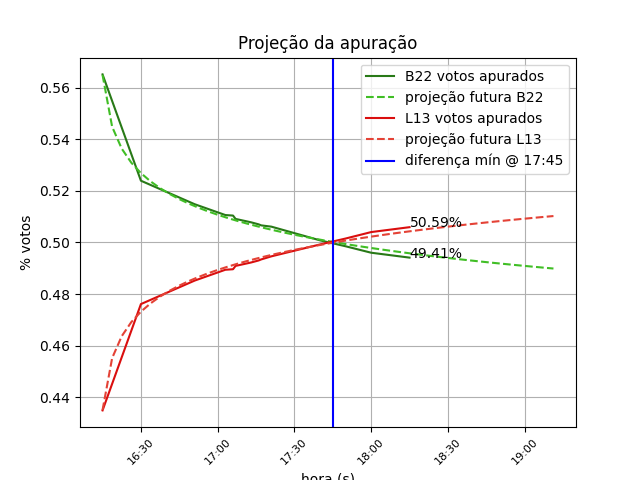

In [19]:
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(1,3, figsize=(10,3))

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))

ax.plot(hora_x, percent_bolso_y, label="B22 votos apurados", color='#287917')
ax.plot(dates.num2date(xlongaduracao), yprojetado_bolso, label="projeção futura B22", linestyle="--", color='#40BE25')

ax.plot(hora_x, percent_lula_y, label="L13 votos apurados", color='#DA0E0E')
ax.plot(dates.num2date(xlongaduracao), yprojetado_lula, label="projeção futura L13", linestyle="--", color='#E44236')

plt.axvline(x = xlongaduracao[index_min_diferenca], color = 'b', label = 'diferença mín @ ' + str(dates.num2date(xlongaduracao[index_min_diferenca]))[:16][11:])

ax.text(hora_x[len(hora_x)-1], percent_bolso_y[len(percent_bolso_y)-1], str(percent_bolso_y[len(percent_bolso_y)-1]*100) + "%", size=10)

ax.text(hora_x[len(hora_x)-1], percent_lula_y[len(percent_lula_y)-1], str(percent_lula_y[len(percent_lula_y)-1]*100) + "%", size=10)

ax.set(xlabel='hora (s)', ylabel='% votos',
       title='Projeção da apuração')
plt.xticks(rotation = 45, fontsize=8)
ax.legend()
ax.grid()
plt.show()